# Quantifying Shakespeare
Analyzing the frequencies of differrent letters in Shakepeare's work.

(Data from: bit.ly/shakespeare-txt)

In this notebook, we will:
1. Read all of Shakespeare's works into a list of strings
2. Count the frequencies of letters used
3. Visualize the frequencies with a bar graph

## Reading Lines


In [10]:
from io import TextIOWrapper

def read_lines(filename: str) -> list[str]:
    """Read a text file into a list of strings for each line."""
    lines: list[str] = []
    file_handle: TextIOWrapper = open(filename, "r")
    for line in file_handle:
        # strip leading and tailing whitespaces " a " -> "a"
        line = line.strip()
        # make every character lowercase
        line = line.lower()
        lines.append(line)
    file_handle.close()
    return lines

shakespeare_lines: list[str] = read_lines("../data/t8.shakespeare.txt")
print(len(shakespeare_lines))

124456


In [4]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutates counts by increasing the value stored at key by 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1

In [7]:
d: dict = {}
tally(d, "a")
print(d)
tally(d, "a")
print(d)


{'a': 1}
{'a': 2}


In [12]:
def count_letters(lines: list[str]) -> dict[str, int]: 
    """Counts the frequencies of all letters in a list of strings."""
    counts: dict[str, int] = {}
    for line in lines: #line is a string
        for letter in line:
            tally(counts, letter)
    return counts

shakes_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakes_letters)

{'t': 329775, 'h': 236868, 'i': 253990, 's': 248989, ' ': 823058, 'e': 447204, '1': 928, '0': 299, 'x': 5294, 'f': 80516, 'l': 170019, 'p': 58464, 'r': 237864, 'n': 243262, 'd': 149462, 'b': 61956, 'y': 94370, 'o': 314600, 'j': 4779, 'c': 88185, 'g': 68199, 'u': 128947, ',': 83174, 'a': 289150, 'w': 89390, '.': 78025, 'm': 111452, 'k': 35408, '!': 8844, '*': 63, '<': 468, 'v': 37569, '9': 948, '-': 8074, '3': 330, '(': 628, ')': 629, '2': 366, '>': 441, '7': 41, '4': 93, '[': 2085, '#': 1, ']': 2077, 'z': 1631, '8': 40, '@': 8, ':': 1827, '=': 1, '%': 1, '"': 470, '/': 5, '6': 63, '5': 82, "'": 31069, ';': 17199, '~': 1, '_': 71, 'q': 3582, '?': 10476, '|': 33, '&': 21, '`': 1, '}': 2}


# Sorting Dictionaties

In [18]:
# Make my dictionary a list
list_version_shakes: list[tuple[str, int]] = list(shakes_letters.items())
print(list_version_shakes)

# Sort a list 
sorted_letters_list = sorted(list_version_shakes)
print(sorted_letters_list)
sorted_letters_dict = dict(sorted_letters_list)
print(sorted_letters_list)

[('t', 329775), ('h', 236868), ('i', 253990), ('s', 248989), (' ', 823058), ('e', 447204), ('1', 928), ('0', 299), ('x', 5294), ('f', 80516), ('l', 170019), ('p', 58464), ('r', 237864), ('n', 243262), ('d', 149462), ('b', 61956), ('y', 94370), ('o', 314600), ('j', 4779), ('c', 88185), ('g', 68199), ('u', 128947), (',', 83174), ('a', 289150), ('w', 89390), ('.', 78025), ('m', 111452), ('k', 35408), ('!', 8844), ('*', 63), ('<', 468), ('v', 37569), ('9', 948), ('-', 8074), ('3', 330), ('(', 628), (')', 629), ('2', 366), ('>', 441), ('7', 41), ('4', 93), ('[', 2085), ('#', 1), (']', 2077), ('z', 1631), ('8', 40), ('@', 8), (':', 1827), ('=', 1), ('%', 1), ('"', 470), ('/', 5), ('6', 63), ('5', 82), ("'", 31069), (';', 17199), ('~', 1), ('_', 71), ('q', 3582), ('?', 10476), ('|', 33), ('&', 21), ('`', 1), ('}', 2)]
[(' ', 823058), ('!', 8844), ('"', 470), ('#', 1), ('%', 1), ('&', 21), ("'", 31069), ('(', 628), (')', 629), ('*', 63), (',', 83174), ('-', 8074), ('.', 78025), ('/', 5), ('0',

<BarContainer object of 64 artists>

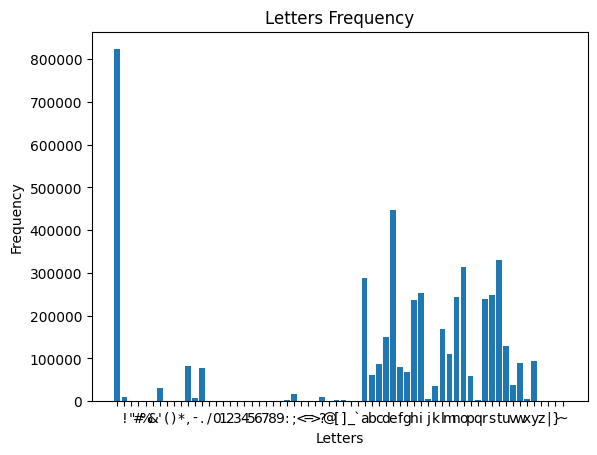

In [19]:
from matplotlib import pyplot

pyplot.title("Letters Frequency")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequency")
labels: list[str] = list(sorted_letters_dict.keys())
values: list[int] = list(sorted_letters_dict.values())
pyplot.bar(labels, values)